# 2章 1次元データの整理

In [1]:
import numpy as np
import pandas as pd

pd.set_option("precision", 3)

In [2]:
df = pd.read_csv("../python_stat_sample/data/ch2_scores_em.csv", index_col="生徒番号")
df.head()

,英語,数学
生徒番号,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [3]:
# 英語の点数の最初の１０個を取得
scores = np.array(df["英語"])[:10]

scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [4]:
index = [chr(i+ord("A")) for i in range(10)]
scores_df = pd.DataFrame({"点数":scores},
                index=pd.Index(index, name="生徒"))

scores_df

,点数
生徒,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


## 平均値

\begin{align*}
    \bar{x} = \frac{1}{N} \sum_{i=0}^{N} x_i
\end{align*}
    
- $\bar{x}: \text{average}$
- $N: \text{length of data}$
- $x_i: \text{each data in }x$

In [5]:
sum(scores)/len(scores)

55.0

In [6]:
# numpyを使った方法
np.mean(scores)

55.0

In [7]:
# pandasを使った方法
scores_df.mean()

点数    55.0
dtype: float64

## 中央値

In [8]:
# 中央値を導出するためにデータを順番に置き直す
scores_sorted = np.sort(scores)
scores_sorted

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [9]:
n = len(scores_sorted)
if n%2 == 0:
    median = (scores_sorted[n//2 - 1] + scores_sorted[n//2])/2
else:
    median = scores_sorted[n//2+1]

median

56.5

In [10]:
# numpy
np.median(scores)

56.5

In [11]:
# pandas
scores_df.median()

点数    56.5
dtype: float64

## 最頻値

In [12]:
tmp_list = [1, 1, 1, 2, 2, 3]
pd.Series(tmp_list).mode()

0    1
dtype: int64

In [13]:
# multiple modes in list
tmp_list = [i+1 for i in range(5)]
pd.Series(tmp_list).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

## 偏差

In [14]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [15]:
# keep copy of scores_df
summary_df = scores_df.copy()
summary_df["偏差"] = deviation
summary_df

,点数,偏差
生徒,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [16]:
scores_ = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
mean_ = np.mean(scores_)
deviation_ = scores_ - mean_
deviation_

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [17]:
# mean of deviation_
mean_deviation = np.mean(deviation_)

mean_deviation

0.0

### 偏差の平均が0になる理由

\begin{align*}
\frac{1}{n} \sum_{i=1}^{n}(x_i - \bar{x}) = \frac{1}{n} \sum_{i=1}^{n}x_i - \frac{1}{n} \sum_{i=1}^{n} \bar{x}\\
= \bar{x} - \bar{x}\\
= 0
\end{align*}

## 分散

In [18]:
var = np.mean(deviation ** 2)
var_np = np.var(scores) # defaults to sample variance
var_pd = scores_df.var() # defaults to unbiased variance
print(f"variance: {var}")
print(f"variance thru numpy: {var_np}")
print(f"variance thru pandas: {var_pd}")

variance: 86.0
variance thru numpy: 86.0
variance thru pandas: 点数    95.556
dtype: float64


In [19]:
summary_df["偏差二乗"] = np.square(deviation)
summary_df

,点数,偏差,偏差二乗
生徒,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


### 標本分散

\begin{align*}
S^2 = \frac{1}{n} \sum_{i=1}^{n}(x_i - \bar{x})^2 \\
(n > 0)
\end{align*}

### 不偏分散

\begin{align*}
\sigma^2 = \frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})^2 \\
(n > 1)
\end{align*}

よって標準偏差は以下のようになる
\begin{align*}
S = \sqrt{S^2} = \sqrt{\frac{1}{n} \sum_{i=1}^{n}(x_i - \bar{x})^2} \\
(n > 0)
\end{align*}

In [20]:
# 標準偏差
np.sqrt(np.var(scores, ddof=0)) # 標本分散を使用
np.std(scores, ddof=0) # 上と同様

9.273618495495704

## 範囲

\begin{align*}
\it{Rg} = x_{max} - x_{min}
\end{align*}

In [21]:
# 範囲
np.max(scores) - np.min(scores)

28

ただし, これだと一つでも大きい値または, 小さい値があると範囲が極端になってしまう
そのため, データの上位数%と下位数%の範囲を用いる場合がある
これを<b>四分位範囲</b> (interquartile range) という

\begin{align*}
IQR = Q3 - Q1
\end{align*}

In [22]:
# 四分位範囲
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

In [23]:
# pandas
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

## データの正規化

データから平均を引き, 標準偏差で割る操作を__標準化 (standardization)__という<br/>
また, 標準化されたデータを__標準化変量 (standardization data)__や__Zスコア (z-score)__という<br/>

\begin{align*}
z_i = \frac{x_i - x}{S}
\end{align*}

In [24]:
z = (scores - np.mean(scores))/np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [25]:
np.mean(z), np.std(z, ddof=0)

(-1.6653345369377347e-17, 0.9999999999999999)

### 標準化されたデータの特徴

- 標準化されたデータの平均は0で標準偏差は1になる
    - (上記のものではそうなっていないように見えるが, 平均の値が極めて0に近いことから無視できる誤差であると言える)
- データと同じ単位をもつ標準偏差で除算していることから, 標準化されたデータは単位を持たない

### 偏差値

偏差値は平均が50, 標準偏差が10になるように正規化したデータのことをいう<br/>
数式では以下のように表す

\begin{align*}
z_i = 50 + 10 \times \frac{x_i - \bar{x}}{S}
\end{align*}

In [26]:
z = 50 + 10 * (scores - np.mean(scores))/np.std(scores)
z

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [27]:
np.mean(z), np.std(z, ddof=0)

(50.0, 10.000000000000002)

In [28]:
scores_df["偏差値"] = z
scores_df

,点数,偏差値
生徒,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


### 1次元データの視覚化

In [29]:
# 50人分の英語のテストの点数
english_scores = np.array(df["英語"])

pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

#### 度数分布表
分割した区間とデータ数を表にまとめたものを__度数分布表__という
- 階級 (class)
    - 区間
- 階級幅
    - 階級の幅
- 階級数
    - 階級の数
- 階級値
    - 各階級の中央値
- 度数 (frequency)
    - 各階級に属しているデータの数

In [30]:
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [31]:
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
freq_dist_df = pd.DataFrame({"度数":freq}, index=pd.Index(freq_class, name="階級"))
freq_dist_df

,度数
階級,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [32]:
# 階級値
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

##### 相対度数
__相対度数__は全データ数に対してその階級のデータが占めている割合の度数を示す

In [33]:
rel_freq = freq/freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

#### 累積相対度数
__累積相対度数__はその階級までの総体度数の和を示す

In [34]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [35]:
freq_dist_df["階級値"] = class_value
freq_dist_df["相対度数"] = rel_freq
freq_dist_df["累積相対度数"] = cum_rel_freq
freq_dist_df = freq_dist_df[["階級値", "度数", "相対度数", "累積相対度数"]]
freq_dist_df

,階級値,度数,相対度数,累積相対度数
階級,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


度数分布表から再瀕値を求めることで最も度数の高い階級値を求めることができる<br/>
_なお, 再瀕値は度数分布表の作り方に大きく依存することを留意する必要がある_

In [36]:
freq_dist_df.loc[freq_dist_df["度数"].idxmax(), "階級値"]

65

### ヒストグラム
__ヒストグラム (histogram)__は度数分布表を棒グラフで表したもの

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

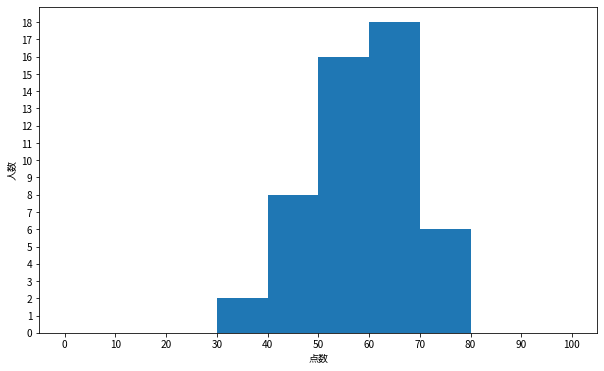

In [38]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))
ax.set_xlabel("点数", )
ax.set_ylabel("人数")
ax.set_xticks(np.linspace(0, 100, 10+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

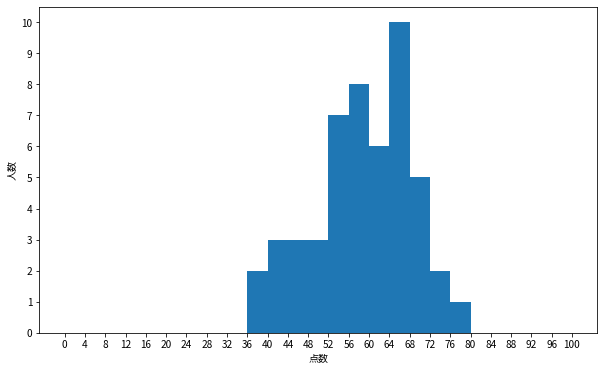

In [39]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
freq, _, _ = ax.hist(english_scores, bins=25, range=(0, 100))
ax.set_xlabel("点数", )
ax.set_ylabel("人数")
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

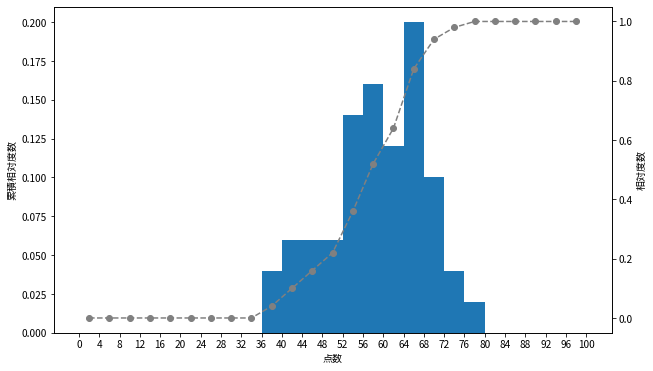

In [40]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

weights = np.ones_like(english_scores)/len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25, range=(0, 100), weights=weights)
cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]
ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color='gray')
ax2.grid(visible=False)
ax1.set_xlabel("点数")
ax1.set_ylabel("累積相対度数")
ax2.set_ylabel("相対度数")
ax2.set_xticks(np.linspace(0, 100, 25+1))

plt.show()